# 🧠 Digit Recognition Using Linear Algebra Foundations

## ✅ Project Objective
To build a machine learning model that recognizes handwritten digits using the Digits dataset, while applying key linear algebra concepts like transpose, cross product, matrix operations, and eigen decomposition.

🧠 Project Title:
"Digit Recognition Using Linear Algebra Foundations"

✅ Project Objective:
To build a machine learning model that recognizes handwritten digits using the Digits dataset, while applying key linear algebra concepts like transpose, cross product, matrix operations, and eigen decomposition. This project simulates a real-world OCR system like those used in postal automation, banking, and exam paper correction.

📌 Why This Project?
Real-world relevance: Handwriting recognition is widely used in industries like postal services, document scanning, bank cheque processing, and digital exams.

Educational goal: Demonstrates how foundational linear algebra concepts support critical ML tasks like image processing, dimensionality reduction, and classification.

🛠️ Practical ML Pipeline
This project covers the complete machine learning workflow:

Data exploration → Preprocessing → Visualization → Modeling → Evaluation

It shows how mathematical operations like transpose, determinant, and covariance apply directly to real-world tasks like digit recognition.

🔨 Project Components and Real-Life Mapping
1. Transpose
Code Example: v.T

Real-Life Application: Image flipping / rotation

Used in Project: Reshape flat data into 8×8 pixel images using .reshape(8,8)

2. Concatenation
Code Example: np.concatenate((v, u))

Real-Life Application: Profile enrichment / data expansion

Used in Project: Simulate merging image data for training

3. Cross Product
Code Example: np.cross(v, u)

Real-Life Application: Robotics / 3D graphics

Used in Project: Illustrates vector orientation (not directly used in the digits model)

4. Covariance
Code Example: np.cov(v)

Real-Life Application: Feature relationship (EDA)

Used in Project: Analyze pixel interactions; helps understand feature correlation

5. Determinant / Rank
Code Example: np.linalg.det(), np.linalg.matrix_rank()

Real-Life Application: Feature selection, multicollinearity check

Used in Project: Detect redundant features or pixel dependencies (important before PCA)

6. Eigenvalues / Eigenvectors
Code Example: via PCA

Real-Life Application: Dimensionality reduction, PageRank, recommender systems

Used in Project: Reduce 64 features into fewer dimensions to improve efficiency

7. Digits Dataset
Code Example: load_digits()

Real-Life Application: OCR systems (postal, banking, exams)

Used in Project: Main dataset for training and testing digit recognition model

8. Standardization
Code Example: StandardScaler()

Real-Life Application: Improve model performance

Used in Project: Normalize pixel values before passing to Logistic Regression

9. Logistic Regression
Code Example: model.fit()

Real-Life Application: Classification problems

Used in Project: Predict the digit class (0–9) based on image pixel values

🧪 Implementation Overview – Step-by-Step
Load Data
Use load_digits() from sklearn.datasets.

Visualize
Display sample digit images using matplotlib.

Explore Matrix Operations

Transpose for reshaping image arrays

Concatenate data arrays

Analyze covariance and rank to understand pixel dependencies

Preprocess
Scale features using StandardScaler to normalize pixel values

Split Data
Use train_test_split() to create training and testing sets

Modeling
Train a LogisticRegression model for digit classification

Evaluate
Measure accuracy using .score() and make predictions using .predict()

Bonus Step
Try PCA to reduce dimensions and compare model performance

📈 Expected Outcome
Achieve a model accuracy of ~98%

Apply core math concepts (like linear algebra and statistics) to:

Understand data

Build efficient models

Interpret results with clarity





In [21]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.datasets import load_digits
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split


In [22]:
digits = load_digits()
print(digits.DESCR)

.. _digits_dataset:

Optical recognition of handwritten digits dataset
--------------------------------------------------

**Data Set Characteristics:**

:Number of Instances: 1797
:Number of Attributes: 64
:Attribute Information: 8x8 image of integer pixels in the range 0..16.
:Missing Attribute Values: None
:Creator: E. Alpaydin (alpaydin '@' boun.edu.tr)
:Date: July; 1998

This is a copy of the test set of the UCI ML hand-written digits datasets
https://archive.ics.uci.edu/ml/datasets/Optical+Recognition+of+Handwritten+Digits

The data set contains images of hand-written digits: 10 classes where
each class refers to a digit.

Preprocessing programs made available by NIST were used to extract
normalized bitmaps of handwritten digits from a preprinted form. From a
total of 43 people, 30 contributed to the training set and different 13
to the test set. 32x32 bitmaps are divided into nonoverlapping blocks of
4x4 and the number of on pixels are counted in each block. This generates
an in

<Figure size 640x480 with 0 Axes>

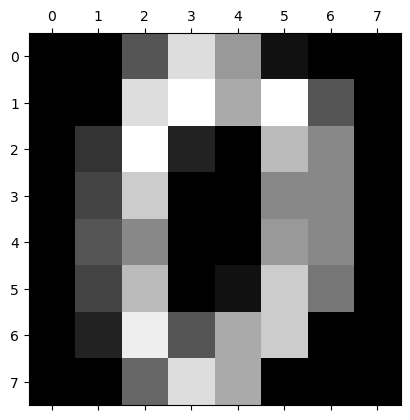

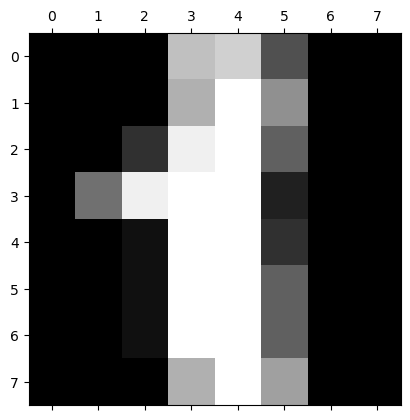

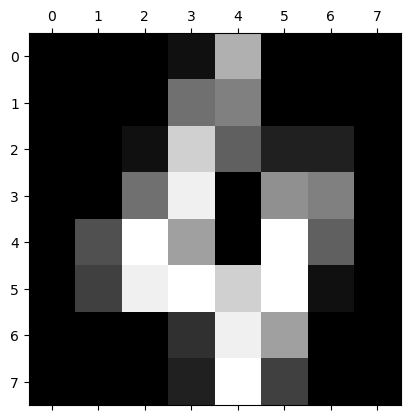

In [23]:
plt.gray()
plt.matshow(digits.data[0].reshape(8,8))
plt.matshow(digits.data[1].reshape(8,8))
plt.matshow(digits.data[4].reshape(8,8))


In [24]:
df = pd.DataFrame(digits.data, columns=digits.feature_names)
df.head()

,pixel_0_0,pixel_0_1,pixel_0_2,pixel_0_3,pixel_0_4,pixel_0_5,pixel_0_6,pixel_0_7,pixel_1_0,pixel_1_1,...,pixel_6_6,pixel_6_7,pixel_7_0,pixel_7_1,pixel_7_2,pixel_7_3,pixel_7_4,pixel_7_5,pixel_7_6,pixel_7_7
0,0.0,0.0,5.0,13.0,9.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,6.0,13.0,10.0,0.0,0.0,0.0
1,0.0,0.0,0.0,12.0,13.0,5.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,11.0,16.0,10.0,0.0,0.0
2,0.0,0.0,0.0,4.0,15.0,12.0,0.0,0.0,0.0,0.0,...,5.0,0.0,0.0,0.0,0.0,3.0,11.0,16.0,9.0,0.0
3,0.0,0.0,7.0,15.0,13.0,1.0,0.0,0.0,0.0,8.0,...,9.0,0.0,0.0,0.0,7.0,13.0,13.0,9.0,0.0,0.0
4,0.0,0.0,0.0,1.0,11.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,2.0,16.0,4.0,0.0,0.0


In [25]:
v = np.array([[1,2,3],[4,5,6],[7,8,9]])
print("Original Matrix:\n", v)
print("Transposed Matrix:\n", v.T)

Original Matrix:
 [[1 2 3]
 [4 5 6]
 [7 8 9]]
Transposed Matrix:
 [[1 4 7]
 [2 5 8]
 [3 6 9]]


In [26]:
u = np.array([[1,2,3],[4,5,6],[7,8,9]])
w = np.concatenate((v, u))
print("Concatenated Matrix:\n", w)

Concatenated Matrix:
 [[1 2 3]
 [4 5 6]
 [7 8 9]
 [1 2 3]
 [4 5 6]
 [7 8 9]]


In [27]:
w = np.cross(v, u)
print("Cross Product:\n", w)

Cross Product:
 [[0 0 0]
 [0 0 0]
 [0 0 0]]


In [28]:
print("Covariance Matrix:\n", np.cov(v))

Covariance Matrix:
 [[1. 1. 1.]
 [1. 1. 1.]
 [1. 1. 1.]]


In [29]:
print("Determinant:", np.linalg.det(v))
print("Matrix Rank:", np.linalg.matrix_rank(v))

Determinant: -9.51619735392994e-16
Matrix Rank: 2


In [30]:
x = df
y = digits.target
scaler = StandardScaler()
x_scaled = scaler.fit_transform(x)
x_scaled[:5]

array([[ 0.        , -0.33501649, -0.04308102,  0.27407152, -0.66447751,
        -0.84412939, -0.40972392, -0.12502292, -0.05907756, -0.62400926,
         0.4829745 ,  0.75962245, -0.05842586,  1.12772113,  0.87958306,
        -0.13043338, -0.04462507,  0.11144272,  0.89588044, -0.86066632,
        -1.14964846,  0.51547187,  1.90596347, -0.11422184, -0.03337973,
         0.48648928,  0.46988512, -1.49990136, -1.61406277,  0.07639777,
         1.54181413, -0.04723238,  0.        ,  0.76465553,  0.05263019,
        -1.44763006, -1.73666443,  0.04361588,  1.43955804,  0.        ,
        -0.06134367,  0.8105536 ,  0.63011714, -1.12245711, -1.06623158,
         0.66096475,  0.81845076, -0.08874162, -0.03543326,  0.74211893,
         1.15065212, -0.86867056,  0.11012973,  0.53761116, -0.75743581,
        -0.20978513, -0.02359646, -0.29908135,  0.08671869,  0.20829258,
        -0.36677122, -1.14664746, -0.5056698 , -0.19600752],
       [ 0.        , -0.33501649, -1.09493684,  0.03864775,  0.

In [31]:
xtrain, xtest, ytrain, ytest = train_test_split(x_scaled, y, test_size=0.2, random_state=100)

In [32]:
model = LogisticRegression(max_iter=1000)
model.fit(xtrain, ytrain)

LogisticRegression(max_iter=1000)

In [33]:
print("Test Accuracy:", model.score(xtest, ytest))

Test Accuracy: 0.9805555555555555


In [34]:
sample = digits.data[0].reshape(1, -1)
sample_df = pd.DataFrame(sample, columns=df.columns)  # Fix for feature name warning
sample_scaled = scaler.transform(sample_df)
print("Predicted label:", model.predict(sample_scaled))

Predicted label: [0]
